In [6]:
# data load

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import neighbors, datasets

dataset = datasets.load_breast_cancer()
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [0]:
# data, target 지정
x = dataset.data
y = dataset.target

In [10]:
# type 확인
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [12]:
# shape 확인
x.shape, y.shape

((569, 30), (569,))

In [0]:
# y shape 변경
y = y.reshape(-1,1)

In [14]:
y.shape

(569, 1)

##KNN

In [16]:
# 최근접 6개 데이터를 비교
# 거리에 따른 가중치 부여

k = 6
nn = neighbors.KNeighborsClassifier(k,weights="distance")
nn.fit(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')

In [0]:
# nn.predict()

##SVM

In [0]:
# train_test set 만들기

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
# SVM library 불러오기

from sklearn import svm

In [0]:
# svm class 생성

cancer_svm = svm.SVC(kernel='linear')

In [33]:
# train data fit

cancer_svm.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
# xtest값 입력시 y값 예측

yResult_svm = cancer_svm.predict(xtest)
yResult_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [35]:
# 성능 평가

from sklearn import metrics
metrics.accuracy_score(yResult_svm, ytest), metrics.precision_score(yResult_svm, ytest)

(0.956140350877193, 0.9402985074626866)

##DecisionTree

In [0]:
# train test set 만들기

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
# decisiontree library 불러오기

from sklearn.tree import DecisionTreeClassifier

In [0]:
# decisiontree class 생성

cancer_dtree = DecisionTreeClassifier()

In [42]:
# train data fit

cancer_dtree.fit(xtest, ytest)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
# xtest입력시 y값 예측

yResult_dtree = cancer_dtree.predict(xtest)

In [0]:
from sklearn import tree
import os
import graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

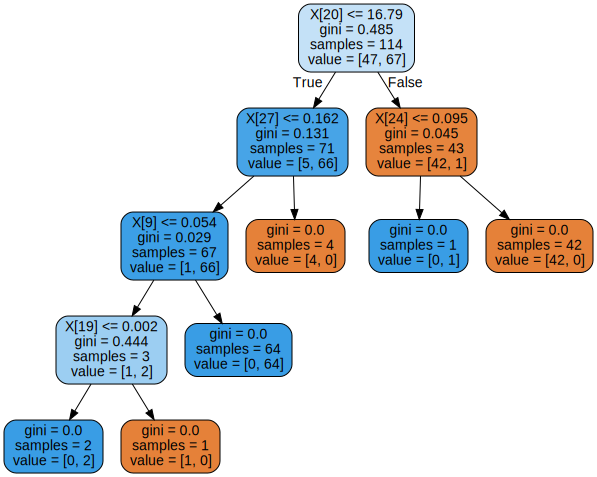

In [51]:
dot_data = tree.export_graphviz(cancer_dtree,
                               out_file=None, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [45]:
# 성능 평가

from sklearn import metrics
metrics.accuracy_score(ytest, yResult_dtree), metrics.precision_score(ytest, yResult_dtree)

(1.0, 1.0)

##LogisticRegression

In [0]:
# train test set 만들기

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
# LogisticRegression library 불러오기

from sklearn.linear_model import LogisticRegression

In [0]:
# LogisticRegression class 생성

cancer_lr = LogisticRegression()

In [56]:
# train data fit

cancer_lr.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# xtest입력시 y값 예측

yResult_lr = cancer_lr.predict(xtest)

In [59]:
# 성능 평가

from sklearn import metrics
metrics.accuracy_score(ytest, yResult_lr), metrics.precision_score(ytest, yResult_lr)

(0.956140350877193, 0.984375)